In [1]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score

In [3]:
import pandas as pd
df = pd.read_csv("C:\\Users\\16395\\Downloads\\train.csv"  )

In [4]:
df = df.dropna()

In [5]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17487,25533,EverQuest II,2013.0,After I had played it extensively for four yea...,1
17488,25534,EverQuest II,2017.0,this was the first MMORPG i've ever played but...,0
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1


In [6]:
def isEnglish(line):
    totalChars = len(line)
    nAsciiChars = 0
    for c in list(line):
        if ord(c) >= 0 and ord(c) <= 128:
            nAsciiChars += 1
    return (nAsciiChars / totalChars) >= 0.5

englishReviews = []
nonEnglishReviews = []


df_filtered = df[df['user_review'].apply(isEnglish)]



In [7]:
df_filtered

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17487,25533,EverQuest II,2013.0,After I had played it extensively for four yea...,1
17488,25534,EverQuest II,2017.0,this was the first MMORPG i've ever played but...,0
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1


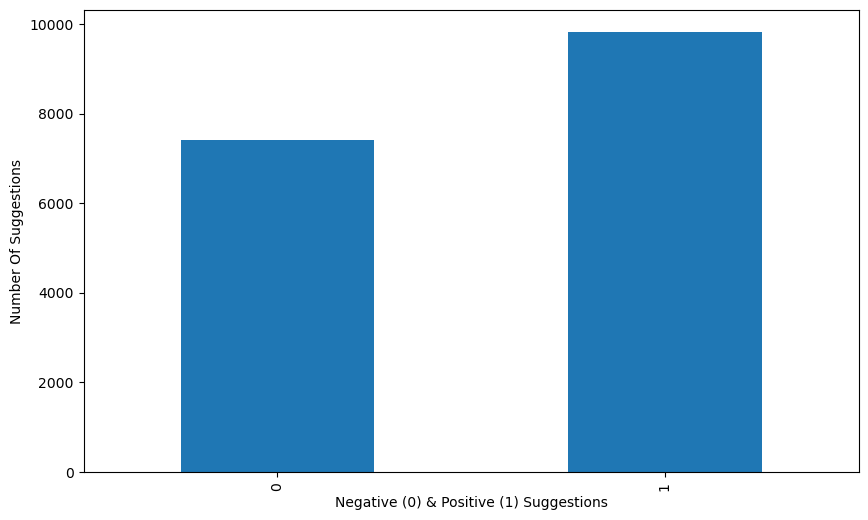

In [10]:
import matplotlib.pyplot as plt
df1= df_filtered.groupby('user_suggestion')
df2= df1['user_suggestion'].count()
df2.plot(kind="bar",figsize=(10,6))
plt.xlabel("Negative (0) & Positive (1) Suggestions")
plt.ylabel("Number Of Suggestions")
plt.show()

In [55]:
x = df_filtered['user_review']

In [59]:
df_filtered['user_suggestion'].value_counts()

1    9825
0    7402
Name: user_suggestion, dtype: int64

In [63]:
length = []
x = x.to_list()
for i in range(len(x)):
    length.append(len(x[i]))

In [64]:
import numpy as np
np.mean(length)

761.4894061647414

In [110]:
mid = int(np.mean(length))
x_mean = []
for i in range(len(x)):
    if len(x[i])>mid:
        x_mean.append(x[i][:mid])
    else:
        x_mean.append(x[i])

In [111]:
len(x_mean)

17227

In [69]:
y = df_filtered['user_suggestion']

In [70]:
y

0        1
1        1
2        1
3        1
4        1
        ..
17487    1
17488    0
17489    1
17490    1
17491    1
Name: user_suggestion, Length: 17227, dtype: int64

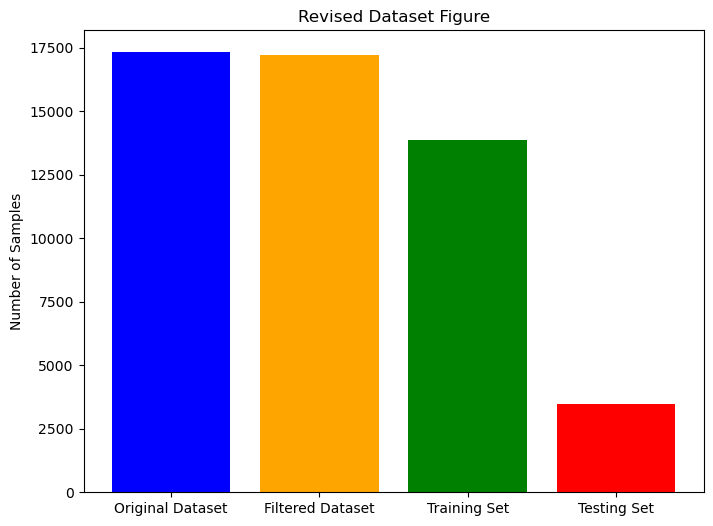

In [12]:
import matplotlib.pyplot as plt

# Assuming 'original_samples' is the total number of samples in the original dataset
original_samples = len(df)
filtered_samples = len(df_filtered) # Number of samples after filtering

# Calculate the number of samples in training and testing sets
train_samples = int(original_samples * 0.8)
test_samples = original_samples - train_samples

# Plot the dataset figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['Original Dataset', 'Filtered Dataset', 'Training Set', 'Testing Set'],
       [original_samples, filtered_samples, train_samples, test_samples],
       color=['blue', 'orange', 'green', 'red'])
ax.set_ylabel('Number of Samples')
ax.set_title('Revised Dataset Figure')
plt.show()

# KNN with original length and stopword removal

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [125]:
from sklearn.neighbors import KNeighborsClassifier

train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

accu = []
for k in range(1, 120):
    print(k, end=' ')
    KNN = KNeighborsClassifier(n_neighbors= k)
    output = KNN.fit(train_x , train_y)
    y_pred = KNN.predict(test_x)
    accuracy = accuracy_score(test_y , y_pred)
    #print("the result for neighbours : " ,k)
    #print(accuracy)
    #print('_________________________________')
    accu.append(accuracy)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 

In [143]:
accu

[0.4254207777132908,
 0.418165989553105,
 0.4245502031340685,
 0.5800928612884504,
 0.5850261172373766,
 0.5861868833430064,
 0.5847359257109692,
 0.5850261172373766,
 0.5856065002901916,
 0.5856065002901916,
 0.5856065002901916,
 0.5856065002901916,
 0.5856065002901916,
 0.5856065002901916,
 0.5856065002901916,
 0.5856065002901916,
 0.5856065002901916,
 0.6334881021474172,
 0.6247823563551944,
 0.671793383633198,
 0.6587347649448636,
 0.6909460243760882,
 0.6790481717933836,
 0.7071967498549042,
 0.696169471851422,
 0.7208357515960534,
 0.7112594312246082,
 0.7330237957051654,
 0.7208357515960534,
 0.7376668601276842,
 0.7251886244921648,
 0.7452118398142774,
 0.7338943702843876,
 0.7513058618688334,
 0.7437608821822402,
 0.7568195008705746,
 0.7484039466047592,
 0.7605919907138712,
 0.7501450957632038,
 0.7597214161346488,
 0.75507835171213,
 0.7669762042948346,
 0.7585606500290192,
 0.7701683110853164,
 0.7637840975043528,
 0.7704585026117238,
 0.7678467788740568,
 0.779744631456761

In [129]:
print ("max of accuracy = " , max(accu))
max_value = max(accu)
max_index = accu.index(max_value) + 1
print(max_index)

max of accuracy =  0.807893209518282
112


In [136]:
test_x.shape

(3446, 10000)

In [144]:
KNN = KNeighborsClassifier(n_neighbors=  91)
output = KNN.fit(train_x , train_y)
y_pred = output.predict(test_x)

In [146]:

y_pred = output.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.7965757399883924
0.9385530227948464
0.7664912990692028
0.8438404989975495


# KNN with original length and without stopword removal

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords


vectorizer = TfidfVectorizer( max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [148]:
from sklearn.neighbors import KNeighborsClassifier

train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

accu = []
for k in range(1, 120):
    print(k, end=' ')
    KNN = KNeighborsClassifier(n_neighbors= k)
    output = KNN.fit(train_x , train_y)
    y_pred = KNN.predict(test_x)
    accuracy = accuracy_score(test_y , y_pred)
    #print("the result for neighbours : " ,k)
    #print(accuracy)
    #print('_________________________________')
    accu.append(accuracy)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 

In [150]:
accu

[0.4239698200812536,
 0.4170052234474753,
 0.4175856065002902,
 0.542658154381892,
 0.5734184561810796,
 0.5623911781775972,
 0.585896691816599,
 0.5870574579222286,
 0.585316308763784,
 0.585316308763784,
 0.585316308763784,
 0.585316308763784,
 0.5856065002901916,
 0.6735345327916424,
 0.6593151479976784,
 0.7217063261752756,
 0.7048752176436448,
 0.7370864770748694,
 0.7260591990713872,
 0.7547881601857226,
 0.7426001160766106,
 0.7666860127684272,
 0.7533372025536854,
 0.7742309924550204,
 0.7675565873476494,
 0.7782936738247244,
 0.7681369704004644,
 0.7806152060359838,
 0.777423099245502,
 0.783517121300058,
 0.777423099245502,
 0.7893209518282066,
 0.7858386535113174,
 0.791642484039466,
 0.792222867092281,
 0.7954149738827626,
 0.790191526407429,
 0.7945443993035404,
 0.7939640162507254,
 0.7945443993035404,
 0.794254207777133,
 0.7994776552524666,
 0.7988972721996518,
 0.7994776552524666,
 0.79570516540917,
 0.7988972721996518,
 0.798316889146837,
 0.8026697620429484,
 0.80295

In [154]:
print ("max of accuracy = " , max(accu))
max_value = max(accu)
max_index = accu.index(max_value) + 1
print(max_index)

max of accuracy =  0.8113755078351712
118


In [157]:
KNN = KNeighborsClassifier(n_neighbors=  118)
output = KNN.fit(train_x , train_y)
y_pred = output.predict(test_x)

In [158]:
y_pred = output.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8113755078351712
0.865213082259663
0.8220338983050848
0.8430709802028007


# naive_bayes with original length and stopword removal

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [107]:
from sklearn.naive_bayes import MultinomialNB

train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

mnb = MultinomialNB()
mnb.fit(train_x, train_y)
print("Multinomial Naive Bayes (No pre-processing): {0} %".format(mnb.score(test_x, test_y) * 100))

Multinomial Naive Bayes (No pre-processing): 85.5194428322693 %


In [108]:

y_pred = mnb.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.855194428322693
0.8929633300297324
0.8642685851318945
0.8783816719473556


# naive_bayes with Original length and without stopword removal

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer( max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [96]:
from sklearn.naive_bayes import MultinomialNB

train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

mnb = MultinomialNB()
mnb.fit(train_x, train_y)
print("Multinomial Naive Bayes (No pre-processing): {0} %".format(mnb.score(test_x, test_y) * 100))

Multinomial Naive Bayes (No pre-processing): 86.07080673244342 %


In [99]:

y_pred = mnb.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8607080673244342
0.8929633300297324
0.872216844143272
0.8824681684622919


# naive_bayes with Mean length and stopword removal

In [100]:
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)

x_vector = vectorizer.fit_transform(x_mean);

In [101]:
from sklearn.naive_bayes import MultinomialNB

train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

mnb = MultinomialNB()
mnb.fit(train_x, train_y)
print("Multinomial Naive Bayes (No pre-processing): {0} %".format(mnb.score(test_x, test_y) * 100))

Multinomial Naive Bayes (No pre-processing): 84.53279164248404 %


In [102]:

y_pred = mnb.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8453279164248404
0.8885034687809713
0.8534031413612565
0.8705996601116777


# naive_bayes with Mean length and without stopword removal

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x_mean);

In [104]:
from sklearn.naive_bayes import MultinomialNB

train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

mnb = MultinomialNB()
mnb.fit(train_x, train_y)
print("Multinomial Naive Bayes (No pre-processing): {0} %".format(mnb.score(test_x, test_y) * 100))

Multinomial Naive Bayes (No pre-processing): 85.69355774811376 %


In [105]:

y_pred = mnb.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8569355774811376
0.8919722497522299
0.8674698795180723
0.8795504519912045


# SVC with Original length and  stopword removal

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [179]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

from sklearn.svm import SVC

clf = SVC(kernel='rbf')

clf.fit(train_x, train_y)


SVC()

In [180]:

y_pred = clf.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8569355774811376
0.8810703666997026
0.8754308222550468
0.8782415411212645


# SVC with Original length and without stopword removal

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


vectorizer = TfidfVectorizer( max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [182]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)


from sklearn.svm import SVC

clf = SVC(kernel='rbf')


clf.fit(train_x, train_y)



SVC()

In [183]:

y_pred = clf.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8746372605919908
0.8944499504459861
0.891798418972332
0.8931222167243938


# SVC with mean length and stopword removal

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x_mean);

In [185]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

from sklearn.svm import SVC

clf = SVC(kernel='rbf')

clf.fit(train_x, train_y)


SVC()

In [186]:
y_pred = clf.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8528728961114336
0.8875123885034688
0.864799613713182
0.8760088041085841


# XGBOOST with original length and stopword removal

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);





In [191]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(train_x, train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [192]:
y_pred = model.predict(test_x)
print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8197910621009866
0.8553022794846382
0.8399026763990267
0.8475325313037073


# XGBOOST with original length without stopword removal

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords


vectorizer = TfidfVectorizer( max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [194]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [195]:
y_pred = model.predict(test_x)
print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8345908299477656
0.8686818632309217
0.8517978620019436
0.8601570166830225


# XGBOOST with mean length and stopword removal

In [196]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x_mean);


In [197]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(train_x, train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [198]:
y_pred = model.predict(test_x)
print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.810504933255949
0.8612487611496531
0.8233064898152535
0.8418503269556793


# RandomForest with original length and stopword removal

In [199]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [201]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500 , random_state = 42)

rf.fit(train_x, train_y)

y_pred = rf.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.832849680789321
0.8825569871159564
0.8400943396226415
0.8608023199613339


# RandomForest with original length without stopword removal

In [204]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer( max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [205]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500 , random_state = 42)

rf.fit(train_x, train_y)

y_pred = rf.predict(test_x)

print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8418456181079512
0.9073339940535183
0.836455002284148
0.8704540052293795


# ANN with original length and stopword removal

In [215]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
ntlkStopWords = list(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=ntlkStopWords, max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [216]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes= (50,) , max_iter = 1000)

model.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)

In [217]:
y_pred = rf.predict(test_x)
print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.5681950087057458
0.8022794846382557
0.5978581979320532
0.6851460008463818


# ANN with original length without stopword removal

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer( max_features=10000, ngram_range=(1,2), min_df = 3)


x_vector = vectorizer.fit_transform(x);

In [213]:
train_x, test_x, train_y, test_y = train_test_split(x_vector, y, test_size=0.2, random_state= 0xDEADBEEF)
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes= (50,) , max_iter = 1000)

model.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)

In [214]:
y_pred = rf.predict(test_x)
print(accuracy_score(y_pred , test_y))
print(precision_score(y_pred , test_y))
print(recall_score(y_pred , test_y))
print(f1_score(y_pred , test_y))

0.8418456181079512
0.9073339940535183
0.836455002284148
0.8704540052293795


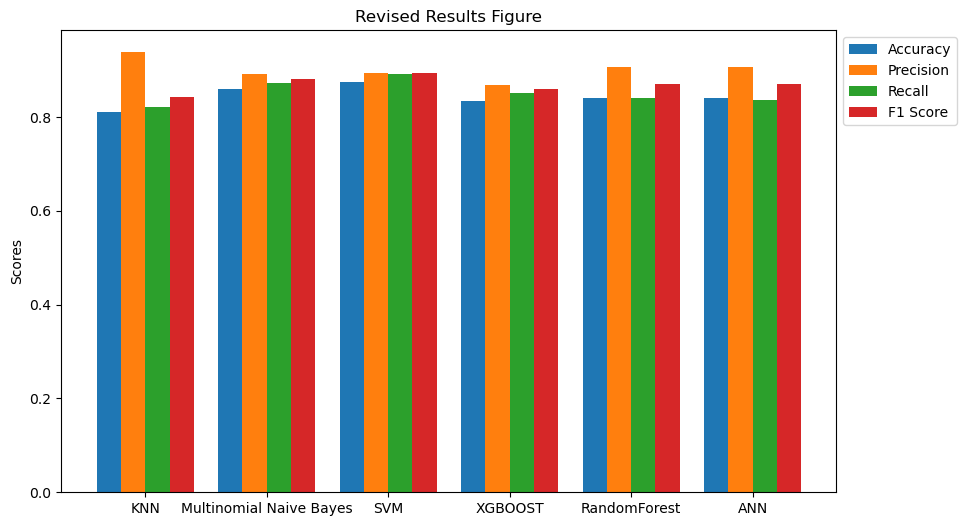

In [19]:
models = ['KNN', 'Multinomial Naive Bayes', "SVM", 'XGBOOST', "RandomForest", "ANN"]
Best_accuracy_scores = [0.811,0.860,0.874,0.834,0.841,0.841]
Best_precision_scores = [0.938,0.892,0.894,0.868,0.907,0.907]
Best_recall_scores = [0.822,0.872,0.891,0.851,0.840,0.836]
Best_f1_scores = [0.843,0.882,0.893,0.860,0.870,0.870]

# Plot the results figure
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
bar_positions = range(len(models))

ax.bar([pos - bar_width * 1.5 for pos in bar_positions], Best_accuracy_scores, width=bar_width, label='Accuracy')
ax.bar([pos - bar_width * 0.5 for pos in bar_positions],  Best_precision_scores, width=bar_width, label='Precision')
ax.bar([pos + bar_width * 0.5 for pos in bar_positions],  Best_recall_scores, width=bar_width, label='Recall')
ax.bar([pos + bar_width * 1.5 for pos in bar_positions],  Best_f1_scores, width=bar_width, label='F1 Score')

ax.set_xticks(bar_positions)
ax.set_xticklabels(models)
ax.set_ylabel('Scores')
ax.set_title('Revised Results Figure')
ax.legend(loc="upper left", bbox_to_anchor=(1.0,1.0))
plt.show()


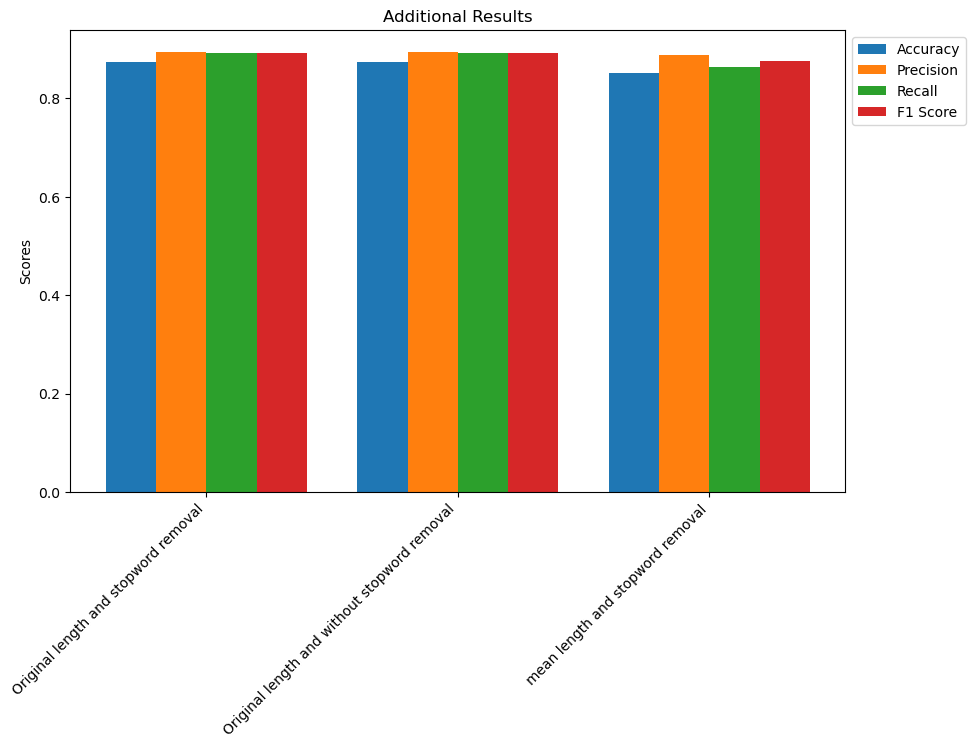

In [32]:
models=["Original length and stopword removal","Original length and without stopword removal",
        "mean length and stopword removal"]
accuracy_scores= [0.874,0.874,0.852]
precision_scores=[0.894,0.894,0.887]
recall_scores=[0.891,0.891,0.864]
f1_scores=[0.893,0.893,0.876]
# Plot the results figure
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
bar_positions = range(len(models))

ax.bar([pos - bar_width * 1.5 for pos in bar_positions],accuracy_scores, width=bar_width, label='Accuracy')
ax.bar([pos - bar_width * 0.5 for pos in bar_positions],precision_scores, width=bar_width, label='Precision')
ax.bar([pos + bar_width * 0.5 for pos in bar_positions],recall_scores, width=bar_width, label='Recall')
ax.bar([pos + bar_width * 1.5 for pos in bar_positions],f1_scores, width=bar_width, label='F1 Score')

ax.set_xticks(bar_positions)
ax.set_xticklabels(models ,rotation=45, ha="right")
ax.set_ylabel('Scores')
ax.set_title('Additional Results')
ax.legend(loc="upper left", bbox_to_anchor=(1.0,1.0))

plt.show()
